 <h1>Image classification of CIFAR-10 dataset into 10 categories

### Importing required libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import layers,datasets,models,Sequential
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

2023-04-15 00:57:12.931611: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-15 00:57:13.007163: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-15 00:57:13.008734: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-15 00:57:14.221846: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


### Loading dataset from keras and spliting dataset into train and test

In [2]:
(X_train,y_train),(X_test,y_test) = datasets.cifar10.load_data()
for i in (X_train,X_test,y_train,y_test):
    print(i.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


### Categorical Features, in which whole dataset has been categorized

In [3]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [4]:
# reshaping 

y_train = y_train.reshape(-1,)
y_train.shape

(50000,)

In [5]:
def plot_img(X,y,index):
    plt.figure(figsize=(5,3))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

In [6]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

### y_train contains images of (frog,truck,truck,deer,automobile) from index 0-4

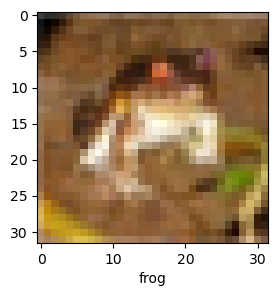

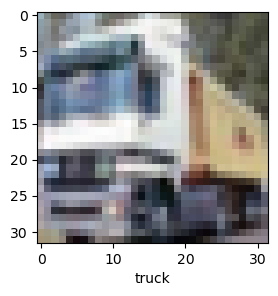

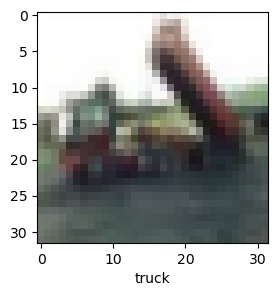

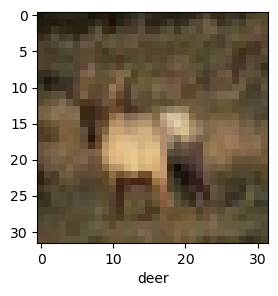

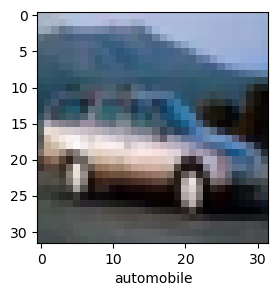

In [7]:
for i in range(5):
    plot_img(X_train,y_train,i)

### Scaling RGB data value of X_train and X_test into 0-1

In [8]:
# As RGB contains 0-255, dividing by 255 gives us scaled value betn 0-1
X_train = X_train/255
X_test = X_test/255

In [9]:
X_train.shape

(50000, 32, 32, 3)

In [10]:
ann_model = Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(1000,activation="relu"),
    layers.Dense(100,activation="relu"),
    layers.Dense(10,activation="sigmoid")
])

ann_model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [11]:
ann_model.fit(X_train,y_train,epochs=5)

Epoch 1/5


2023-04-15 00:57:21.026218: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


1563/1563 [==============================] - 62s 39ms/step - loss: 1.8989 - accuracy: 0.3110
Epoch 2/5
1563/1563 [==============================] - 61s 39ms/step - loss: 1.6958 - accuracy: 0.3903
Epoch 3/5
1563/1563 [==============================] - 61s 39ms/step - loss: 1.6278 - accuracy: 0.4155
Epoch 4/5
1563/1563 [==============================] - 63s 40ms/step - loss: 1.5734 - accuracy: 0.4365
Epoch 5/5
1563/1563 [==============================] - 61s 39ms/step - loss: 1.5335 - accuracy: 0.4513


### After 5 epochs, our trained ANN model has a accurate prediction ratio of 0.46%

In [12]:
print(f"Loss & Accuracy of test dataset : {ann_model.evaluate(X_test,y_test)}")

313/313 [==============================] - 2s 7ms/step - loss: 1.5342 - accuracy: 0.4528
Loss & Accuracy of test dataset : [1.5342071056365967, 0.4528000056743622]


### On basis of resultant data, I can conclude that my trained ANN model will classify accurate image on a ratio of [ 0.45/1 ] with a loss of 1.5.
### Hence, there is a resaon why ANN is failed in Image Classification as it directly works on a computation of image as a whole instead of computing on a specific part independent of other computations, and obtain more accurate resultant, which has been acheived by using CNN model.

In [13]:
y_pred = ann_model.predict(X_test)

313/313 [==============================] - 2s 7ms/step


In [14]:
y_pred[:5]

array([[0.45686567, 0.64000785, 0.63129395, 0.8287996 , 0.19176184,
        0.6386862 , 0.55935484, 0.30462766, 0.56446457, 0.3623901 ],
       [0.6911129 , 0.9389427 , 0.08424743, 0.1450177 , 0.1037563 ,
        0.02906081, 0.0235633 , 0.02180552, 0.97969854, 0.95898736],
       [0.853741  , 0.92748433, 0.08884152, 0.08356835, 0.12259153,
        0.03901309, 0.00778782, 0.05843201, 0.9860766 , 0.8917459 ],
       [0.74547476, 0.53872216, 0.40638947, 0.2270145 , 0.27954587,
        0.10755496, 0.02071312, 0.18864964, 0.9255116 , 0.416608  ],
       [0.18875407, 0.05584471, 0.642168  , 0.55679333, 0.91434693,
        0.5635787 , 0.8165109 , 0.5239254 , 0.2098396 , 0.06488855]],
      dtype=float32)

### As we can see that, y_pred contains categorical probability of o/p layer, each list contains probabilistic value of 10 varied values as we have specified 10 layers in o/p of ANN.
### In order to easily understand the o/p, we will convert y_pred data into more precise understandable form

In [15]:
y_pred_data = [data.argmax() for data in y_pred]
y_pred_data[:5]

[3, 8, 8, 8, 4]

### Our target of conversion of probabilistic value into precise understandable discrete value has been achieved

In [16]:
y_test_shaped = y_test.reshape(-1,)
list(y_test_shaped[:5])

[3, 8, 8, 0, 6]

### After comparing first five values of actual o/p and predicted o/p, only 2 value is accurate,rest are inaccurate

### Visualising evaluation of actual data and predicted data

In [17]:
from sklearn.metrics import confusion_matrix,classification_report

In [18]:
cnm = confusion_matrix(y_test_shaped,y_pred_data)

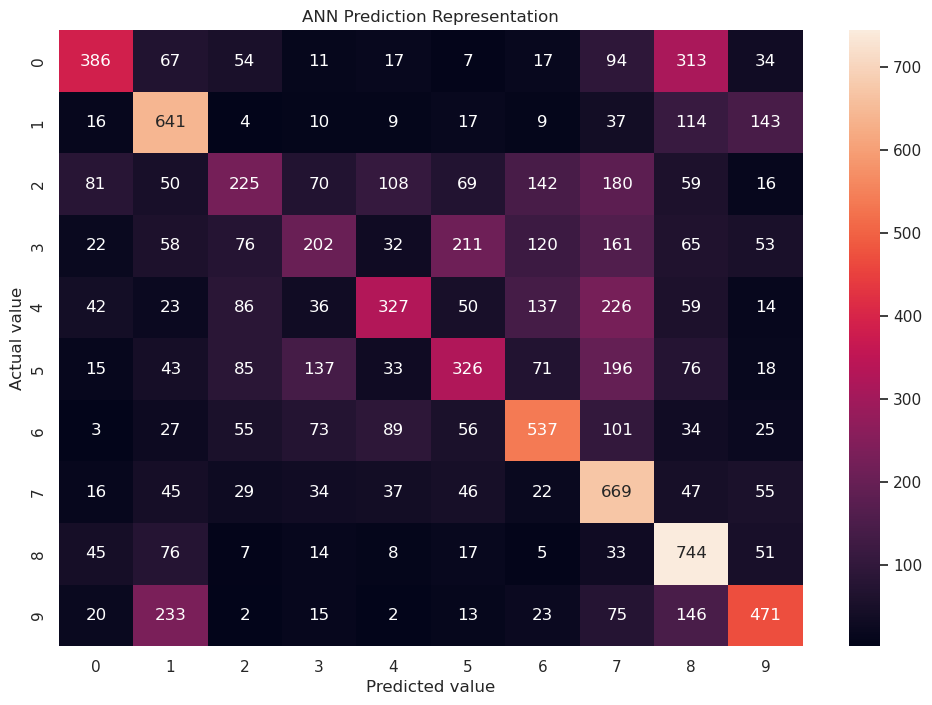

In [19]:
sns.set()
plt.figure(figsize=(12,8))
sns.heatmap(cnm,annot=True,fmt='d')
plt.title("ANN Prediction Representation")
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.show()

In [20]:
print(classification_report(y_test,y_pred_data))

              precision    recall  f1-score   support

           0       0.60      0.39      0.47      1000
           1       0.51      0.64      0.57      1000
           2       0.36      0.23      0.28      1000
           3       0.34      0.20      0.25      1000
           4       0.49      0.33      0.39      1000
           5       0.40      0.33      0.36      1000
           6       0.50      0.54      0.52      1000
           7       0.38      0.67      0.48      1000
           8       0.45      0.74      0.56      1000
           9       0.54      0.47      0.50      1000

    accuracy                           0.45     10000
   macro avg       0.46      0.45      0.44     10000
weighted avg       0.46      0.45      0.44     10000



### Training same dataset with CNN

In [21]:
cnn_model = Sequential([
    #cnn
    layers.Conv2D(filters=20,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=40,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    # ann
    layers.Flatten(),
    layers.Dense(100,activation="relu"),
    layers.Dense(10,activation="softmax")
])

cnn_model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

### Here, filter size can be reinforced on basis of accuracy. I have assumed 20, [ greater the filter size, more the accuracy will be ]
### Image will be filtering on basis of 3x3 matrix

### 'softmax'  is used as an activation fun, end resultant will always be 1, which is contrast to a functionality of sigmoid

In [22]:
cnn_model.fit(X_train,y_train,epochs=5)

Epoch 1/5


2023-04-15 01:02:53.223663: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


1563/1563 [==============================] - 34s 21ms/step - loss: 1.4693 - accuracy: 0.4714
Epoch 2/5
1563/1563 [==============================] - 33s 21ms/step - loss: 1.1431 - accuracy: 0.5969
Epoch 3/5
1563/1563 [==============================] - 33s 21ms/step - loss: 1.0155 - accuracy: 0.6444
Epoch 4/5
1563/1563 [==============================] - 33s 21ms/step - loss: 0.9301 - accuracy: 0.6749
Epoch 5/5
1563/1563 [==============================] - 33s 21ms/step - loss: 0.8583 - accuracy: 0.7018


In [23]:
cnn_model.evaluate(X_test,y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.9236 - accuracy: 0.6842


[0.9235892295837402, 0.6841999888420105]

In [24]:
y_pred = cnn_model.predict(X_test)

313/313 [==============================] - 2s 7ms/step


In [25]:
y_pred_data = [data.argmax() for data in y_pred]
y_pred_data[:5]

[3, 8, 1, 0, 4]

In [26]:
y_test_shaped[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

### After comparing first five values of actual o/p and predicted o/p, 4 values are accurate,and only 1 is inaccurate

### Visualising evaluation of actual data and predicted data


In [27]:
cnm = confusion_matrix(y_test_shaped,y_pred_data)

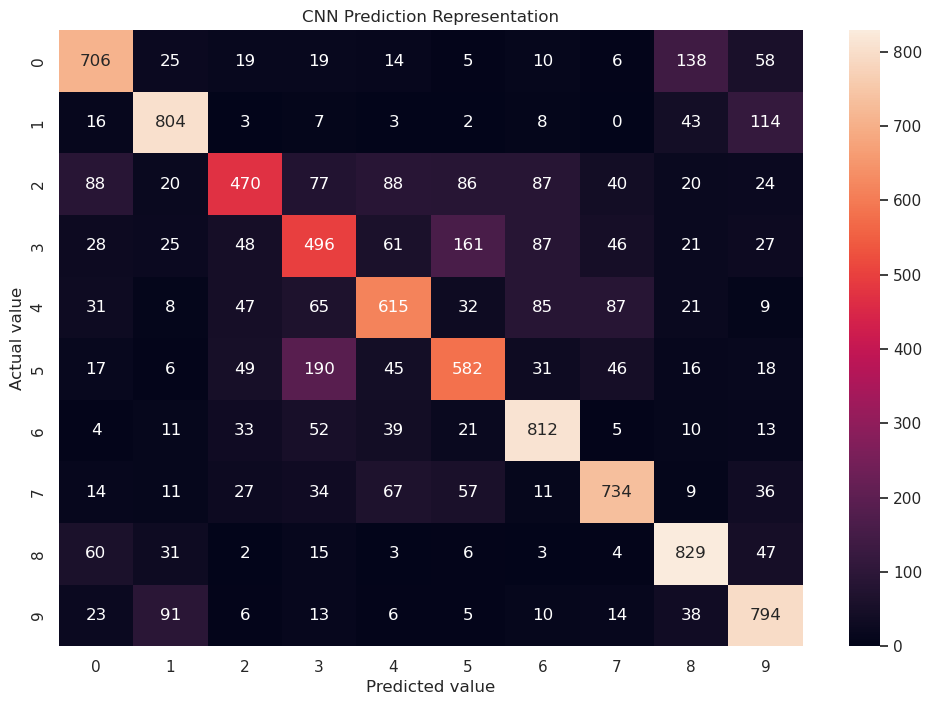

In [28]:
sns.set()
plt.figure(figsize=(12,8))
sns.heatmap(cnm,annot=True,fmt='d')
plt.title("CNN Prediction Representation")
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.show()

In [29]:
print(classification_report(y_test,y_pred_data))

              precision    recall  f1-score   support

           0       0.72      0.71      0.71      1000
           1       0.78      0.80      0.79      1000
           2       0.67      0.47      0.55      1000
           3       0.51      0.50      0.50      1000
           4       0.65      0.61      0.63      1000
           5       0.61      0.58      0.59      1000
           6       0.71      0.81      0.76      1000
           7       0.75      0.73      0.74      1000
           8       0.72      0.83      0.77      1000
           9       0.70      0.79      0.74      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000



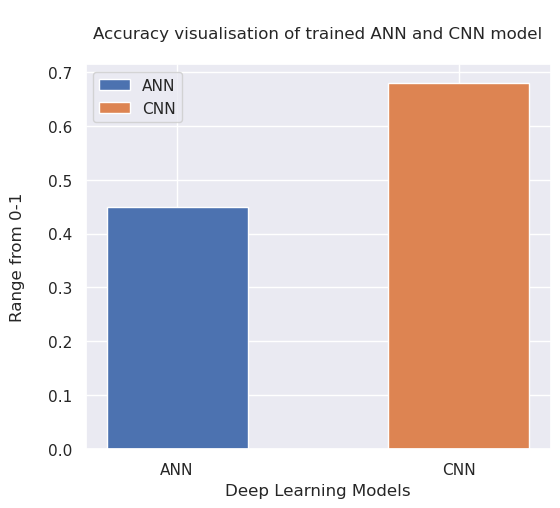

In [31]:
sns.set()
plt.figure(figsize=(6,5))
plt.bar(['ANN'],[0.45],width=0.5,label=['ANN'])
plt.bar(['CNN'],[0.68],width=0.5,label=['CNN'])

plt.legend()
plt.title("\nAccuracy visualisation of trained ANN and CNN model\n")
plt.xlabel('Deep Learning Models')
plt.ylabel('Range from 0-1\n')
plt.show()